In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
os.chdir("C:/Users/prasa/Learning_Jupyter_Files")

In [3]:
data = pd.read_csv("train.csv")

In [4]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
target = data["label"]

In [6]:
data.drop("label", axis=1, inplace=True)

In [7]:
data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data.shape

(42000, 784)

In [9]:
# Column Standardization
from sklearn.preprocessing import StandardScaler

In [10]:
standardized_data = StandardScaler().fit_transform(data)

In [11]:
# Import T-SNE from sklearn
from sklearn.manifold import TSNE

In [12]:
# Applying TSNE model with default preplexity and number of iteration
model = TSNE(n_components=2, random_state=100)

In [13]:
tsne_data = model.fit_transform(standardized_data)

In [14]:
tsne_data.shape

(42000, 2)

In [15]:
target.shape

(42000,)

In [16]:
tsne_data = np.vstack((tsne_data.T, target)).T

In [17]:
tsne_df = pd.DataFrame(tsne_data, columns=("1st", "2nd", "labels"))

C:\Users\prasa\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


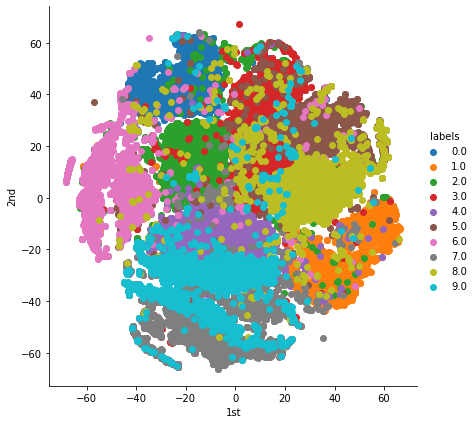

In [18]:
# Plotting the reduced MNIST dataset
sns.FacetGrid(tsne_df, hue="labels",size=6).map(plt.scatter, "1st", "2nd").add_legend()
plt.show()